# Gradient Descent for Linear Regression  

This document explains the process of implementing gradient descent for optimizing a linear regression model using the `gradient_descent_reg` class. The class provides a structured approach to training the model, updating weights, and assessing performance through metrics like the Mean Squared Error (MSE).  

## Overview  

Gradient descent is an iterative optimization algorithm used to minimize a function by adjusting the parameters (weights) of the model to reduce the difference between predicted and actual outputs. In the context of linear regression, this involves finding the best-fitting line that minimizes the error between predicted values and actual target values.  

## Key Components of the Implementation  

### 1. Class Structure  

The class `gradient_descent_reg` encapsulates all functionality related to gradient descent for linear regression. It is designed with several important methods:  

- **Initialization**: Sets up the model parameters, including input features, target weights, learning rate, and more.  
- **Loss Function**: Computes the MSE, which quantifies the difference between predicted and actual values.  
- **Gradient Calculation**: Derives the slope of the loss function to determine how to adjust the weights.  
- **Weight Update**: Applies the gradient descent update rule to refine the weights iteratively over a specified number of iterations.  
- **Training Method**: Combines the initialization and update processes in the `fit` method.  
- **Visualization**: Plots the loss over iterations to help visualize the convergence process.  

### 2. Initialization  

When creating an instance of the `gradient_descent_reg` class, you provide the necessary parameters, including:  

- **Input features (x)**: The data used to train the model.  
- **Final weights (w_final)**: The desired output values that the model is trying to predict.  
- **Learning rate (alpha)**: A scalar that dictates the step size of updates to the weights during training.  
- **Decay rate**: An optional parameter controlling how the learning rate decreases over time to facilitate convergence.  
- **Number of iterations (n_iters)**: The total number of updates to perform during the training process.  

### 3. Training Process  

The core of the process is in the `fit` method, which performs the following steps:  

1. **Initialization of Theta**: The starting value of the parameter `theta` is either randomly chosen or set to a specified value.  
2. **Iterative Updates**: For a set number of iterations:  
   - **Calculate Loss**: The MSE is computed based on the current value of `theta`.  
   - **Compute Gradient**: The gradient of the loss function is calculated to determine the direction of the weight adjustment.  
   - **Update Weights**: The current value of `theta` is updated by stepping in the direction of the negative gradient, scaled by the learning rate.  
3. **Store Theta Values**: Throughout the iterations, `theta` values are stored to visualize the training process later.  

### 4. Learning Rate Decay  

In the `fit_decay_1` method, the learning rate is updated at each iteration according to a specified decay strategy. This can help the optimization process stabilize and improve convergence as the algorithm progresses.  

### 5. Visualization  

The `plot` method visualizes the progression of the loss function over iterations. By plotting the loss against the number of iterations, you can observe whether the model is converging towards a minimum loss value, indicating successful training.  

## Conclusion  

The `gradient_descent_reg` class provides a structured and flexible approach to implementing gradient descent for linear regression. By encapsulating the process in a class, it becomes easier to manage, modify, and reuse code for various datasets. The choice of learning rate, decay strategies, and the ability to visualize the training process make this implementation useful for understanding the mechanics of gradient descent in practice.  

Feel free to explore different learning rates and provide conclusions about the gradient descent convergence.

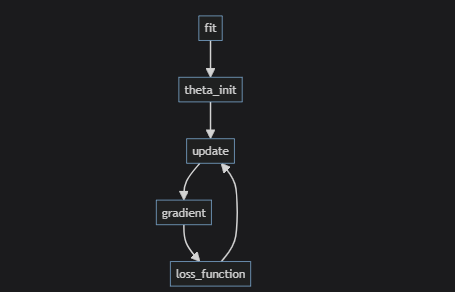

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from concurrent import futures
sns.set()

Generating 141 numbers.

In [ ]:
x = np.linspace(-1, 6, 141)

In [ ]:
x

array([-1.  , -0.95, -0.9 , -0.85, -0.8 , -0.75, -0.7 , -0.65, -0.6 ,
       -0.55, -0.5 , -0.45, -0.4 , -0.35, -0.3 , -0.25, -0.2 , -0.15,
       -0.1 , -0.05,  0.  ,  0.05,  0.1 ,  0.15,  0.2 ,  0.25,  0.3 ,
        0.35,  0.4 ,  0.45,  0.5 ,  0.55,  0.6 ,  0.65,  0.7 ,  0.75,
        0.8 ,  0.85,  0.9 ,  0.95,  1.  ,  1.05,  1.1 ,  1.15,  1.2 ,
        1.25,  1.3 ,  1.35,  1.4 ,  1.45,  1.5 ,  1.55,  1.6 ,  1.65,
        1.7 ,  1.75,  1.8 ,  1.85,  1.9 ,  1.95,  2.  ,  2.05,  2.1 ,
        2.15,  2.2 ,  2.25,  2.3 ,  2.35,  2.4 ,  2.45,  2.5 ,  2.55,
        2.6 ,  2.65,  2.7 ,  2.75,  2.8 ,  2.85,  2.9 ,  2.95,  3.  ,
        3.05,  3.1 ,  3.15,  3.2 ,  3.25,  3.3 ,  3.35,  3.4 ,  3.45,
        3.5 ,  3.55,  3.6 ,  3.65,  3.7 ,  3.75,  3.8 ,  3.85,  3.9 ,
        3.95,  4.  ,  4.05,  4.1 ,  4.15,  4.2 ,  4.25,  4.3 ,  4.35,
        4.4 ,  4.45,  4.5 ,  4.55,  4.6 ,  4.65,  4.7 ,  4.75,  4.8 ,
        4.85,  4.9 ,  4.95,  5.  ,  5.05,  5.1 ,  5.15,  5.2 ,  5.25,
        5.3 ,  5.35,

Let us take the following objective function:

$$
f(\theta) = (\theta - 2.5)^2 - 1
$$

and its corresponding gradient:

$$
f^{'}(\theta) = 2 * (\theta - 2.5)
$$

In [ ]:
def J(theta):
  return (theta - 2.5)**2-1

In [ ]:
def gradJ(theta):
  return 2*(theta - 2.5)

Let us trace the function as follows.

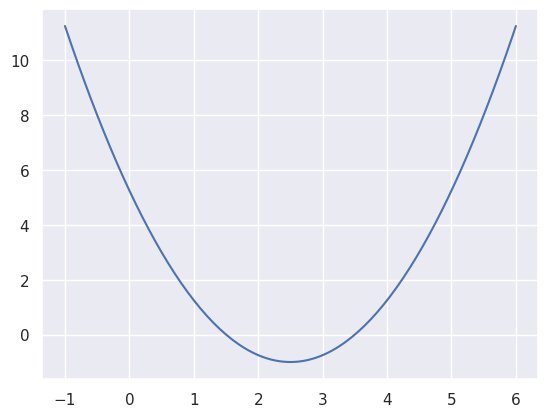

In [ ]:
plt.plot(x, J(x))

Initialization of the parameters.

In [ ]:
theta = 0.0 # the parameter of the function to update
etha = 0.1 # the learning rate
epsilon = 0.001 # the threshold

In [ ]:
while True:
  past_theta = theta
  theta = theta - etha*gradJ(theta)
  if np.abs(theta - past_theta) < epsilon:
    print(theta)
    print(J(theta))
    print(gradJ(theta))
    break

2.496131437377233
-0.9999850342232337
-0.007737125245533605


In [ ]:
class gradient_descent_reg:
    """Gradient Descent for linear regression
    This class implements the gradient descent algorithm to optimize
    weights for a linear regression model.
    """

    def __init__(self, x, w_final, alpha, decay_rate=1, n_iters=1000, min=None):
        """
        Initializes the GradientDescentReg object.

        Parameters:
        x : array-like
            Input features for the regression model.
        w_final : array-like
            Final weights (target values) for the model. These will be optimized.
        alpha : float
            Learning rate for the optimization process. Controls the step size
            for weight updates.
        decay_rate : float, optional
            The rate at which the learning rate decays. Default is 1 (no decay).
        n_iters : int, optional
            Number of iterations for the optimization process. Default is 1000.
        min : float or None, optional
            Minimum threshold for weights, if applicable.
        """
        self.x = x  # The input features.
        self.w_final = w_final  # The target or final weights to fit.
        self.alpha = alpha  # Learning rate.
        self.decay_rate = decay_rate  # Rate of learning rate decay.
        self.min = min  # Optional minimum threshold for weights.
        self.n_iters = n_iters  # Number of iterations for training.

    def theta_init(self, theta_init):
        """Initializes theta with either a random value or a given initial value.

        Parameters:
        theta_init : float or None
            Initial value for theta. If None, initializes randomly.
        """
        self.theta = np.random.randint(-1000, 1000) if theta_init is None else theta_init

    def loss_function(self):
        """Calculates the Mean Squared Error (MSE) loss.

        Returns:
        float : The computed loss value.
        """
        return (self.theta - self.w_final) ** 2  # Simple MSE formulation.

    def gradient(self):
        """Calculates the gradient of the loss function.

        Returns:
        float : The gradient value.
        """
        return 2 * (self.theta - self.w_final)  # Gradient calculation for MSE.

    def update(self):
        """Updates theta based on the calculated gradient and learning rate."""
        self.theta = self.theta - self.alpha * self.gradient()  # Gradient descent update step.

    def fit(self, theta_init=None):
        """Trains the model.

        Parameters:
        theta_init : float or None
            Optional initial value for theta. If None, initializes randomly.
        """
        self.theta_init(theta_init)
        self.new_theta = [self.theta]  # List to store theta values over iterations.
        for i in range(self.n_iters):
            self.update()  # Update theta.
            self.new_theta.append(self.theta)  # Keep track of theta values.
        self.new_theta = np.array(self.new_theta)  # Convert to numpy array.

        # Print the final values and performance metrics.
        print(self.theta)
        print(self.loss_function())
        print(self.gradient())

    def fit_decay_1(self, theta_init=None):
        """Fitting the model with a decaying learning rate.

        Parameters:
        theta_init : float or None
            Optional initial value for theta. If None, initializes randomly.
        """
        self.theta_init(theta_init)
        self.new_theta = [self.theta]  # Store theta values.
        for i in range(self.n_iters):
            self.update()  # Update theta with regular learning rate.
            self.new_theta.append(self.theta)
            self.alpha = (1 / (1 + self.decay_rate * i)) * self.alpha  # Decay learning rate.
        self.new_theta = np.array(self.new_theta)

        # Print the final values and performance metrics.
        print(self.theta)
        print(self.loss_function())
        print(self.gradient())

    def plot(self):
        """Plots the loss function and the updates in theta.

        This method visualizes how the loss changes over iterations and overlays the
        updates of theta.
        """
        theta = self.theta  # Save the current value of theta.
        self.theta = self.x  # Assign x to theta for plotting, likely an error.
        plt.plot(self.x, self.loss_function())  # Plot loss against x.
        self.theta = self.new_theta  # Restore new theta for plot.
        plt.plot(self.new_theta, self.loss_function(), marker="x")  # Mark updates of theta on the plot.
        self.theta = theta  # Restore original theta to maintain state.

In [ ]:
x = np.linspace(-1000, 1000, 1000).round(1)
x2 = np.linspace(-2000, 400, 1000).round(1)

###Training the linear regression and visualizing the gradient descent.

57.10000009022033
8.139707121184193e-15
1.8044065086542105e-07


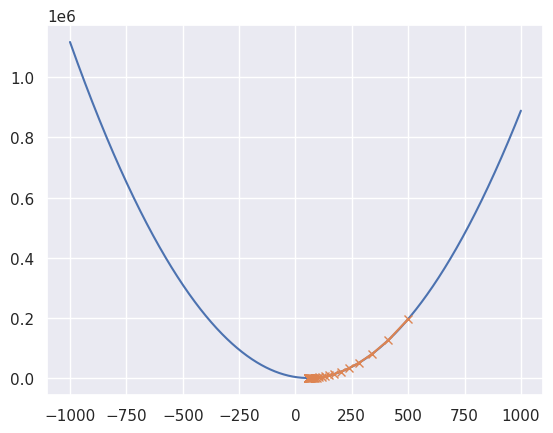

In [ ]:
gradient_descent = gradient_descent_reg(x, 57.1, 0.1, n_iters=100)
gradient_descent.fit(500)
gradient_descent.plot()

Implementing the previous lines of code inside a function to ease the gradient descent.

In [ ]:
def make_fitting(x, w_final, alpha, decay_rate = 1, n_iters = 100):
  gradient_descent = gradient_descent_reg(x, w_final, alpha, decay_rate, n_iters)
  gradient_descent.fit(500)
  return gradient_descent

57.10000009022033
8.139707121184193e-15
1.8044065086542105e-07


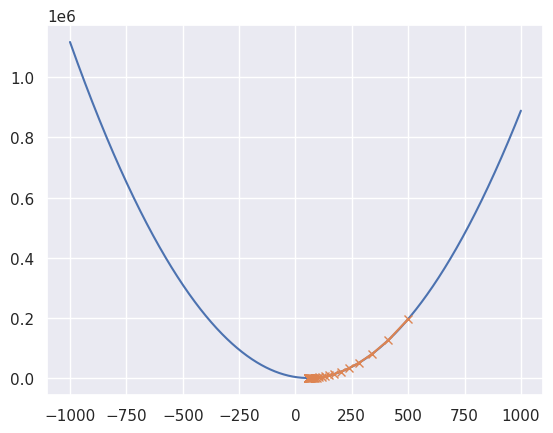

In [ ]:
gradient_descent1 = make_fitting(x, 57.1, 0.1)
gradient_descent1.plot()


-335.0999998298871
2.8938402897555485e-14
3.40225824402296e-07


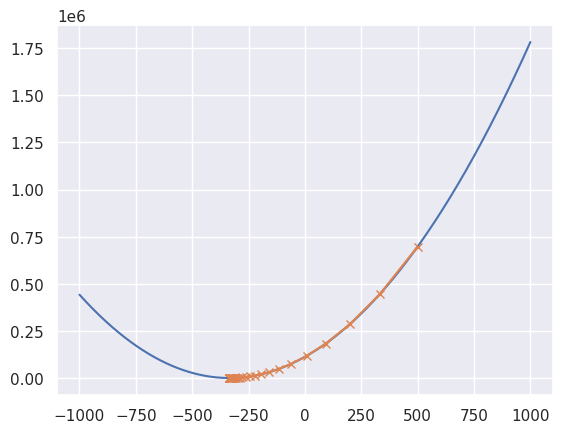

In [ ]:
gradient_descent2 = make_fitting(x, -335.1, 0.1)
gradient_descent2.plot()

In [ ]:
gradient_descent1.alpha

0.1

### Learning rate decay

In [ ]:
def make_fitting_decay_1(x, w_final, alpha, decay_rate = 1, n_iters = 100):
  gradient_descent = gradient_descent_reg(x, w_final, alpha, decay_rate, n_iters)
  gradient_descent.fit_decay_1(500) # notice that we use the decay rate here
  return gradient_descent

301.16521457982697
59567.82896789698
488.13042915965394


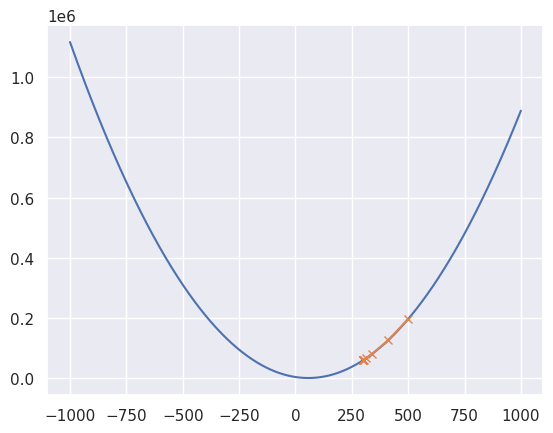

In [ ]:
gradient_descent1 = make_fitting_decay_1(x, 57.1, 0.1)
gradient_descent1.plot()

125.09160238341246
211776.31090421282
920.383204766825


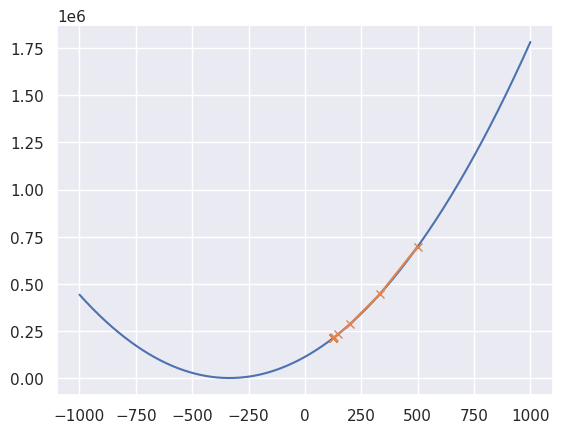

In [ ]:
gradient_descent2 = make_fitting_decay_1(x, -335.1, 0.1)
gradient_descent2.plot()

In [ ]:
gradient_descent2.alpha

1.0715102881254666e-159